In [18]:
import cv2
import re
import json
import pytesseract
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

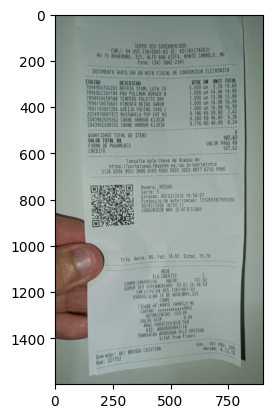

In [19]:
img = mpimg.imread('comp01.jpeg') # Carrega a imagem
plt.imshow(img) # Exibe a imagem

In [20]:
def otimizar_imagem(image_path):
    # 1. Carregar e Redimensionar (ajuda na detecção de fontes pequenas)
    img = cv2.imread(image_path)
    img = cv2.resize(img, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
    
    # 2. Conversão para tons de cinza
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # 3. Remoção de ruído preservando bordas
    denoised = cv2.fastNlMeansDenoising(gray, h=10)
    
    # 4. Limiarização Adaptativa de Gauss (você já viu que funciona bem)
    thresh = cv2.adaptiveThreshold(
        denoised, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2
    )
    
    return thresh

In [21]:
def extrair_campos_chave(texto):
    # Regex para extrair dados comuns em notas fiscais brasileiras
    dados = {
        "CNPJ": re.search(r"\d{2}\.\d{3}\.\d{3}/\d{4}-\d{2}", texto),
        "Data": re.search(r"\d{2}/\d{2}/\d{2,4}", texto),
        "Valor Total": re.search(r"(?:VALOR TOTAL R\$|TOTAL R\$)\s*([\d,.]+)", texto, re.IGNORECASE)
    }
    
    return {k: (v.group(0) if v else "Não encontrado") for k, v in dados.items()}



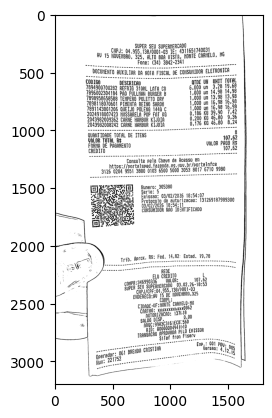

In [22]:
# Execução do pipeline
img_processada = otimizar_imagem('comp01.jpeg')
plt.imshow(img_processada, cmap='gray') # Exibe a imagem processada

In [23]:

#--custom_config = r'--oem 3 --psm 4 -l por'
texto_bruto = pytesseract.image_to_string(img,lang='por')# config=custom_config)

resultado = extrair_campos_chave(texto_bruto)
print(json.dumps(resultado, indent=4, ensure_ascii=False))

{
    "CNPJ": "Não encontrado",
    "Data": "03/02/2026",
    "Valor Total": "Não encontrado"
}


In [24]:
import cv2
import pytesseract

def preprocessamento_leve(image_path):
    img = cv2.imread(image_path)
    
    # 1. Aumentar a escala (DPI)
    # O Tesseract performa muito melhor com caracteres grandes. 
    # Dobrar o tamanho com interpolação CUBIC suaviza as letras.
    img = cv2.resize(img, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
    
    # 2. Converter para Tons de Cinza (sem binarizar ainda)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # 3. Leve desfoque (Blur) 
    # Ajuda a conectar os pontos de impressoras térmicas/matriciais
    # que costumam falhar se binarizarmos direto.
    blur = cv2.GaussianBlur(gray, (3,3), 0)
    
    return blur

# Teste com a configuração que você usou
imagem_melhorada = preprocessamento_leve('comp01.jpeg')
texto = pytesseract.image_to_string(imagem_melhorada, lang='por')
print(texto)

Ea fo RPE RR
EE rop

' EA 4 Arad a do a = É UM o “Y
SUPER SEU SUPERMERCADO a
CHPJ: 04,955. 138/0 - 43U69I74003]
AU 15 NOVEMBRO, 325, TO BOA VR, NONTE CARMELO, Há
Fone: (34) 3842-2341

Fo be
ao.

=

o EX.
Pas papa io E:

-.- É

cena um SUS SRT a Ed Da o us sd 6 n07 6 É GU pa RS CS AD N

COD 160 DESCRICAO TDE UM UNIT T
TasAgoyTanama REFRLG 310NL LATA CO 6.000 un 3,28 19,
T83600Z304184 PAO PULLWAN GURGER É 1.000 un 14,98 14,98

16895 ES6S88 TENPERO POLEITO DRY 1,000 un 13,98 13,98

1496 18070601 PIMENTA RETHO SARON 1.000 un 16,98 16,98

91143001206 QUEIJO POLENG 1496 C 1.000 un 16,98 16,98

nn MA O Oo 006,00 9:56 |) O
2043962008242 CARNE HANUR KIJOTA 0.176 KG 46,80 8,24
QUANTIDADE TOTAL DE ITENS 8

y AL 107,62

FORMA DE PAGAMENTO VALOR PAGO R$

CREDITO 107,62

Consulte pela Chave de Acesso en
“https; //portalsped. fazenda.ng.vou.br/partalníce
3126 0204 9551 3800 0103 6500 5000 3053 8017 6710 3980

Nunero: 305380

Serie: 5

Enissão: 03/02/2026 18:54:07

Protocolo de autorização: 1312691879

In [25]:
resultado = extrair_campos_chave(texto_bruto)
print(json.dumps(resultado, indent=4, ensure_ascii=False))

{
    "CNPJ": "Não encontrado",
    "Data": "03/02/2026",
    "Valor Total": "Não encontrado"
}


In [ ]:
config = r'--tessdata-dir tessdata'
texto = pytesseract.image_to_string(img, lang='por', config=config)
print(texto)